In [1]:
#Import necessary library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

import warnings
warnings.filterwarnings("ignore")

# TAble of Contents
Tasks:
1) Which store has maximum sales

2) Which store has maximum standard deviation i.e., the sales vary a lot. Also, find out the coefficient of mean to standard deviation

3) Which store/s has good quarterly growth rate in Q3’2012

4) Some holidays have a negative impact on sales. Find out holidays which have higher sales than the mean sales in non-holiday season for all stores together

5) Provide a monthly and semester view of sales in units and give insights

In [2]:
# Reading in data in dataframe
wm = pd.read_csv('WALMART_SALES_DATA.csv')
wm.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [3]:
#check up for missing value
wm.isna().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

# Task 1: Which store has maximum sales

In [6]:
wm.groupby('Store').sum()['Weekly_Sales'].sort_values(ascending = False).head(3)


Store
20    3.013978e+08
4     2.995440e+08
14    2.889999e+08
Name: Weekly_Sales, dtype: float64

Answer - Store 20 had the highest sales with 3.013978e+08 dollar

# Task 2: Which store has maximum standard deviation i.e., the sales vary a lot. Also, find out the coefficient of mean to standard deviation

In [7]:
wm.groupby('Store').std()['Weekly_Sales'].sort_values(ascending = False).head()

Store
14    317569.949476
10    302262.062504
20    275900.562742
4     266201.442297
13    265506.995776
Name: Weekly_Sales, dtype: float64

In [8]:
# Calculating Coefficient of Variation (CV)

# Equation is CV = The Standard Deviation of dataset / The mean of dataset

cv = wm.groupby('Store').std()['Weekly_Sales'] / wm.groupby('Store').mean()['Weekly_Sales']
cv = cv.reset_index().rename(columns = {'Weekly_Sales': 'Coefficient of Variation'})

cv.head()

,Store,Coefficient of Variation
0,1,0.100292
1,2,0.123424
2,3,0.115021
3,4,0.127083
4,5,0.118668


In [9]:
# Maximum CV
cv.sort_values(by='Coefficient of Variation', ascending = False).head()

,Store,Coefficient of Variation
34,35,0.229681
6,7,0.197305
14,15,0.193384
28,29,0.183742
22,23,0.179721


Answer: Store 14 had the maximum standard deviation in Weekly Sales. Additionally, Store 35 has the maximum coefficient of variation at approximately 0.229681

# Task 3: Which store/s has good quarterly growth rate in Q3’2012

In [10]:
# Convert Date column to datetime object
wm['Date'] = pd.to_datetime(wm['Date'], format="%d-%m-%Y")
wm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


In [11]:
# Extract the year and month
wm['Year'] = pd.DatetimeIndex(wm['Date']).year
wm['Month'] = pd.DatetimeIndex(wm['Date']).month
wm.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,2010,2
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,2010,2
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,2010,3


In [12]:
# Quarter Three is from month July (6) to September (9) and Year 2012

wm_q3_2012 = wm[(wm['Month'].isin([6,7,8,9])) & (wm['Year'] == 2012)] 
wm_q3_2012.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month
121,1,2012-06-01,1624477.58,0,77.95,3.501,221.747214,7.143,2012,6
122,1,2012-06-08,1697230.96,0,78.30,3.452,221.749484,7.143,2012,6
123,1,2012-06-15,1630607.00,0,79.35,3.393,221.762642,7.143,2012,6
124,1,2012-06-22,1527845.81,0,78.39,3.346,221.803021,7.143,2012,6
125,1,2012-06-29,1540421.49,0,84.88,3.286,221.843400,7.143,2012,6


In [13]:
fig = px.bar(data_frame = wm_q3_2012.groupby('Store').sum().reset_index(),
             x = 'Store', y = 'Weekly_Sales', text = 'Weekly_Sales')


fig.update_layout(title = 'Total Weekly Sales of 45 Walmart stores during Q3 of 2012',
                  yaxis_title = 'Total Weekly Sales',
                  font = dict(family = "Courier New, monospace",
                              size = 14, color = 'black')
                  )

fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')

fig.update_layout(
    xaxis = dict(
        tickmode = 'array',
        tickvals = [n for n in range(1,46)],
    )
)



fig.show()

# Percentage Change

In [14]:
# Growth Rate by Store so first recorded date of quarter 3 to last date
wm_q3_2012['Date'].iloc[0] , wm_q3_2012['Date'].iloc[-1]

(Timestamp('2012-06-01 00:00:00'), Timestamp('2012-09-28 00:00:00'))

In [15]:
gr_wm = wm_q3_2012[(wm_q3_2012['Date'] == '2012-06-01') | (wm_q3_2012['Date'] == '2012-09-28')]
pct_wm = gr_wm.groupby('Store')['Weekly_Sales'].pct_change().dropna().reset_index().rename(columns={'index':'Store','Weekly_Sales':'%Change'})
pct_wm['Store'] = gr_wm['Store'].unique()
pct_wm.head()

,Store,%Change
0,1,-0.115371
1,2,-0.085662
2,3,-0.098216
3,4,-0.069626
4,5,-0.138179


In [16]:
# Top Performing WM Stores during Q3 2012
pct_wm.sort_values(by='%Change',ascending=False).head()

,Store,%Change
43,44,0.098627
16,17,0.036001
31,32,-0.000386
29,30,-0.003773
36,37,-0.007256


In [18]:
# Decrease in weekly sales a lot during Q3 2012
pct_wm.sort_values(by='%Change',ascending=False).tail()

,Store,%Change
28,29,-0.150243
14,15,-0.165774
5,6,-0.185584
26,27,-0.189384
13,14,-0.257125


Answer - Store 17 and 44 were the only two Wm Stores that have increased their weekly sales during Quarter 3 of year 2012. Other than those two, other stores had decreased their weekly sales. Although Store 4 had the highest weekly sales during this time period, their sales actually went down.

# Task 4 : Some holidays have a negative impact on sales. Find out holidays which have higher sales than the mean sales in non-holiday season for all stores together

Note on Holiday Events -->

Super Bowl: 12-Feb-10, 11-Feb-11, 10-Feb-12, 8-Feb-13
Labour Day: 10-Sep-10, 9-Sep-11, 7-Sep-12, 6-Sep-13
Thanksgiving: 26-Nov-10, 25-Nov-11, 23-Nov-12, 29-Nov-13
Christmas: 31-Dec-10, 30-Dec-11, 28-Dec-12, 27-Dec-13

In [20]:
# Creating Holiday DataFrame
holiday = wm[wm['Holiday_Flag'] == 1]
holiday.tail()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month
6375,45,2011-09-09,746129.56,1,71.48,3.738,186.673738,8.625,2011,9
6386,45,2011-11-25,1170672.94,1,48.71,3.492,188.350400,8.523,2011,11
6391,45,2011-12-30,869403.63,1,37.79,3.389,189.062016,8.523,2011,12
6397,45,2012-02-10,803657.12,1,37.00,3.640,189.707605,8.424,2012,2
6427,45,2012-09-07,766512.66,1,75.70,3.911,191.577676,8.684,2012,9


In [21]:
# What are holiday dates present here?
holiday['Date'].value_counts()

2010-02-12    45
2010-09-10    45
2010-11-26    45
2010-12-31    45
2011-02-11    45
2011-09-09    45
2011-11-25    45
2011-12-30    45
2012-02-10    45
2012-09-07    45
Name: Date, dtype: int64

In [22]:
# Assigning Holiday Name to Each presented date to make it easier for the comparison 

# Super Bowl: 12-Feb-10, 11-Feb-11, 10-Feb-12, 8-Feb-13
# Labour Day: 10-Sep-10, 9-Sep-11, 7-Sep-12, 6-Sep-13
# Thanksgiving: 26-Nov-10, 25-Nov-11, 23-Nov-12, 29-Nov-13
# Christmas: 31-Dec-10, 30-Dec-11, 28-Dec-12, 27-Dec-13

from datetime import datetime

super_bowl = [datetime.strptime(date,"%d-%b-%y").date() for date in '12-Feb-10, 11-Feb-11, 10-Feb-12, 8-Feb-13'.split(", ")]
labour_day = [datetime.strptime(date,"%d-%b-%y").date() for date in '10-Sep-10, 9-Sep-11, 7-Sep-12, 6-Sep-13'.split(", ")]
thanksgiving = [datetime.strptime(date,"%d-%b-%y").date() for date in '26-Nov-10, 25-Nov-11, 23-Nov-12, 29-Nov-13'.split(", ")]
christmas = [datetime.strptime(date,"%d-%b-%y").date() for date in '31-Dec-10, 30-Dec-11, 28-Dec-12, 27-Dec-13'.split(", ")]

def assign_holiday(date):
    if date in super_bowl:
        return 'Super Bowl'
    elif date in labour_day:
        return 'Labor Day'
    elif date in thanksgiving:
        return 'Thanksgiving'
    elif date in christmas:
        return 'Christmas'
    else:
        return 'Not Holiday'
    
holiday['Occasion'] = holiday['Date'].apply(lambda date: assign_holiday(date))
holiday.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Occasion
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,2010,2,Super Bowl
31,1,2010-09-10,1507460.69,1,78.69,2.565,211.495190,7.787,2010,9,Labor Day
42,1,2010-11-26,1955624.11,1,64.52,2.735,211.748433,7.838,2010,11,Thanksgiving
47,1,2010-12-31,1367320.01,1,48.43,2.943,211.404932,7.838,2010,12,Christmas
53,1,2011-02-11,1649614.93,1,36.39,3.022,212.936705,7.742,2011,2,Super Bowl


In [23]:
holiday_year = holiday.groupby(['Year','Occasion']).sum().reset_index()

fig = px.bar(data_frame = holiday_year, 
             x = 'Year', y = 'Weekly_Sales',
             color = 'Occasion', barmode = 'group',
             text = 'Weekly_Sales', height = 550,
             color_discrete_sequence = px.colors.qualitative.Safe)

fig.update_layout(title = 'Walmart Total Sales from 2010 to 2012 by Public Holiday',
                  yaxis_title = 'Total Sales',
                  legend_title = 'Holiday',
                  font = dict(family = "Courier New, monospace",
                              size = 14, color = 'black')
                  )

fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')

fig.update_layout(
    xaxis = dict(
        tickmode = 'array',
        tickvals = [n for n in range(2010,2013)],
    )
)

fig.show()

In [26]:
#Mean sales in non-holiday season for all stores together
non_holi_mean_sales = wm[wm['Holiday_Flag'] == 0]['Weekly_Sales'].mean()
non_holi_mean_sales / 10**6

1.0412563802088564

In [27]:
# Holiday Sales that is greater than mean 
holiday.groupby('Occasion')['Weekly_Sales'].mean() / 10**6 # Unit in Million (easier for comparison)

Occasion
Christmas       0.960833
Labor Day       1.042427
Super Bowl      1.079128
Thanksgiving    1.471273
Name: Weekly_Sales, dtype: float64

# Task 5: Provide a monthly and semester view of sales in units and give insights

In [28]:
# Top 3 Total Sales Walmart across 2 year
fig = px.line(data_frame = wm[wm['Store'].isin(wm.groupby('Store').sum().sort_values(by='Weekly_Sales',ascending = False).iloc[:3].index.to_list())],
              x = 'Date', y = 'Weekly_Sales',
              color = 'Store', color_discrete_sequence = px.colors.qualitative.Safe)

fig.update_layout(title = 'Top 3 Walmart Stores (by Total Sales) Weekly Sales',
                  yaxis_title = 'Weekly Sales',
                  font = dict(family = "Courier New, monospace",
                              size = 14, color = 'black')
                  )

fig.show()

In [29]:
# Monthly Sales
import calendar

fig = px.bar(data_frame = wm.groupby('Month').sum().reset_index(),
             x = 'Month', y = 'Weekly_Sales',
             text = 'Weekly_Sales', height = 550)

fig.update_layout(title = 'Walmart Overall Monthly Sales from 2011 to 2013',
                  yaxis_title = 'Total Sales',
                  font = dict(family = "Courier New, monospace",
                              size = 14, color = 'black')
                  )

fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')

fig.update_yaxes(tickprefix="$")

fig.update_layout(
    xaxis = dict(
        ticktext = [calendar.month_name[n] for n in range(1,13)],
        tickvals = [n for n in range(1,13)]
    )
)

fig.show()

In [30]:
fig = px.bar(data_frame = wm.groupby(['Month','Year']).sum().reset_index(),
             x = 'Month', y = 'Weekly_Sales', color = 'Year',
             text = 'Weekly_Sales', height = 550)

fig.update_layout(title = 'Walmart Monthly Sales by Year',
                  yaxis_title = 'Total Sales',
                  font = dict(family = "Courier New, monospace",
                              size = 14, color = 'black')
                  )

fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')

fig.update(layout_coloraxis_showscale=False)

fig.update_yaxes(tickprefix="$")

fig.update_layout(
    xaxis = dict(
        ticktext = [calendar.month_name[n] for n in range(1,13)],
        tickvals = [n for n in range(1,13)]
    )
)

fig.show()

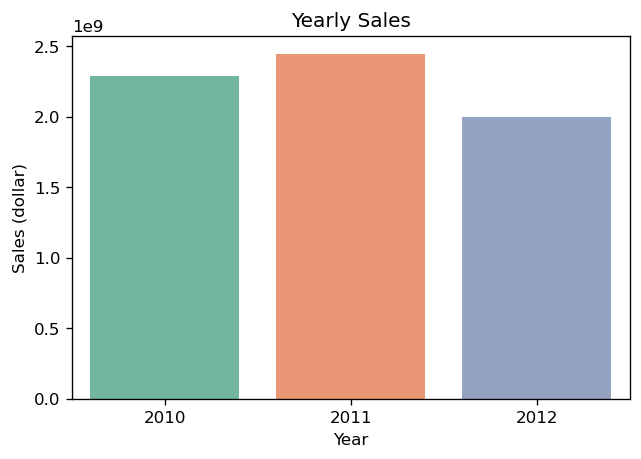

In [31]:
# By Year Sales
plt.figure(dpi=120)
sns.barplot(data = wm.groupby('Year').sum().reset_index(),
            x = 'Year', y = 'Weekly_Sales', palette = 'Set2')
plt.title("Yearly Sales")
plt.ylabel("Sales (dollar)")
plt.show()

# Statistical Model

Task - For Store 1 – Build prediction models to forecast demand (Linear Regression – Utilize variables like date and restructure dates as 1 for 5 Feb 2010 (starting from the earliest date in order). Hypothesize if CPI, unemployment, and fuel price have any impact on sales.) Change dates into days by creating new variable. Select the model which gives best accuracy.

In [33]:
# Recap of how does the Data Look like
wm.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,2010,2
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,2010,2
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,2010,3


In [34]:
# Adding More columns
wm['Day'] = pd.DatetimeIndex(wm['Date']).day
wm['Holiday'] = wm['Date'].apply(lambda date: assign_holiday(date))


wm.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Day,Holiday
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,2010,2,5,Not Holiday
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,2010,2,12,Super Bowl
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2,19,Not Holiday
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2,26,Not Holiday
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,2010,3,5,Not Holiday


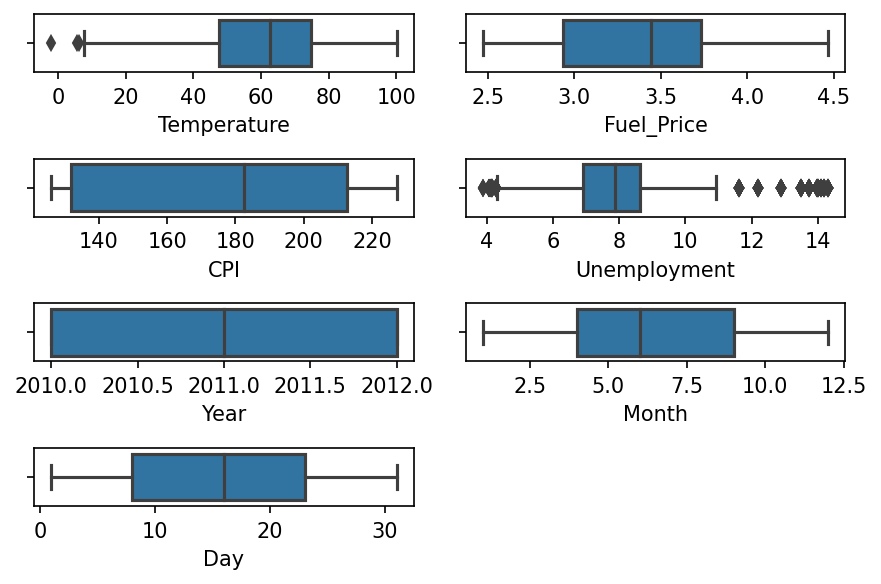

In [35]:
# Checking for outlier and NaN value

features_list = 'Temperature, Fuel_Price, CPI, Unemployment, Year, Month, Day'.split(", ")

plt.figure(dpi=150)
count = 1
for feature in features_list:
    plt.subplot(4,2,count)
    sns.boxplot(wm[feature])
    count += 1
plt.tight_layout()
plt.show()

In [36]:
# Removing Outlier

def remove_out(feature):

    p25 = wm[feature].quantile(0.25)
    p75 = wm[feature].quantile(0.75)
    iqr = p75 - p25
    
    upper_limit = p75 + 1.5 * iqr 
    lower_limit = p25 - 1.5 * iqr
    
    new_df = wm[(wm[feature] > lower_limit) & (wm[feature] < upper_limit)]
    
    return new_df

for feature in features_list:
    wm = remove_out(feature)
wm.shape

(5951, 12)

In [37]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
wm['Holiday'] = ordinal_encoder.fit_transform(wm[['Holiday']])

print(ordinal_encoder.categories_)

[array(['Christmas', 'Labor Day', 'Not Holiday', 'Super Bowl',
       'Thanksgiving'], dtype=object)]


In [38]:
corr_matrix = wm.corr()
corr_matrix['Weekly_Sales'].sort_values(ascending = False)

Weekly_Sales    1.000000
Month           0.074373
Holiday         0.068339
Holiday_Flag    0.036672
Fuel_Price      0.011150
Day            -0.015058
Year           -0.034154
Temperature    -0.062210
Unemployment   -0.074868
CPI            -0.087470
Store          -0.322210
Name: Weekly_Sales, dtype: float64

In [39]:
from sklearn.model_selection import train_test_split

features = 'Temperature, Fuel_Price, CPI, Unemployment, Year, Month, Day, Holiday'.split(", ")
target = 'Weekly_Sales'

X = wm[features]
y = wm[target]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)

In [40]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

prediction = lin_reg.predict(X_test)

In [41]:
from sklearn.metrics import mean_squared_error

lin_rmse = np.sqrt(mean_squared_error(y_test, prediction))
print("RSME:", lin_rmse)
print("Score:", lin_reg.score(X_train, y_train) * 100,"%")

RSME: 563649.8710597762
Score: 3.3758061412219154 %


<AxesSubplot:ylabel='Weekly_Sales'>

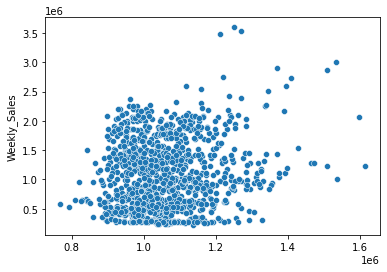

In [42]:
sns.scatterplot(prediction, y_test)

In [43]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(X_train, y_train)

tree_prediction = tree_reg.predict(X_test)
tree_rmse = np.sqrt(mean_squared_error(y_test, tree_prediction))
print("RMSE:",tree_rmse)
print("Score:", tree_reg.score(X_train, y_train) * 100, "%")

RMSE: 652676.3393986803
Score: 86.94142128744495 %


<AxesSubplot:ylabel='Weekly_Sales'>

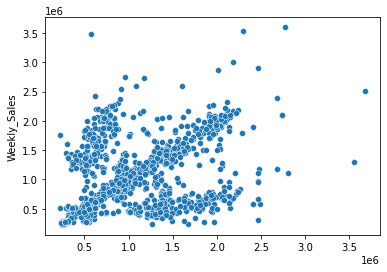

In [44]:
sns.scatterplot(tree_prediction, y_test)

In [45]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(X_train, y_train)

forest_prediction = forest_reg.predict(X_test)
forest_rmse = np.sqrt(mean_squared_error(y_test, forest_prediction))
print("RMSE:",forest_rmse)
print("Score:", forest_reg.score(X_train, y_train) * 100, "%")

RMSE: 547188.266201453
Score: 79.40595876041175 %


<AxesSubplot:ylabel='Weekly_Sales'>

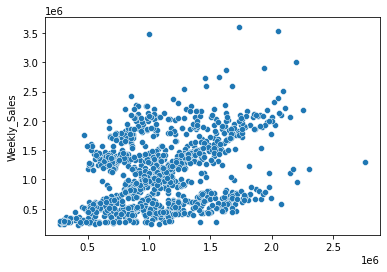

In [46]:
sns.scatterplot(forest_prediction, y_test)

In [47]:
# Fine-Tune model using GridSearch
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [3, 10, 30, 45, 60], 'max_features': [2,4,6,8]},
]

forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv = 5,
                           scoring = 'neg_mean_squared_error',
                           return_train_score = True)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30, 45, 60]}],
             return_train_score=True, scoring='neg_mean_squared_error')